# KNN Model that Predicts the Success of a Mobile Game Published on the Google Play Store Based on the Rating and Rating Count

The following Technical Notebook describes the creation process of a k nearest neighbors model that predicts if a mobile game published on the Google Play Store will have success depending on the Rating and Rating count that this mobile game has. The data set used in the creation of this model was analyzed using Graphs and Descriptive Statistics which showed interesting conclusions. These conclusions stated that the Rating and the Rating count that a mobile game has influences the number of installs that this mobile game can have. The data set used in this project needed to be modified with the purpose of making the data more manageable. If you would like to access the original data set, the following link will redirect you to it. [Click Here to see the Original Data Set](https://www.kaggle.com/gauthamp10/google-playstore-apps)

## Information about the Data Set and Model

This model classifies mobile games based on the number of installs that each game has. Then using the Rating and the Rating count it tries to predict if the game will have success or not. The idea is that all mobile games that have success have similar Rating and Rating count; moreover, those mobile games that do not succeed also have similar Rating and Rating count between them. Therefore, creating a KNN model that uses the Rating Count and Rating to classify each game is perfect for the purpose of this project.

- **Rating:** It is an average of all the ratings that an app has. The lowest is 1.0 and the highest is 5.0.
- **Rating Count:** It is the number of ratings that an app has.
- **Classification:** I have given a classification to each game depending on the number of installs that it has. Those with more than 100,000 downloads are classified as **success** and does that not are classified as **not success**.

## Rating vs Rating Count

### Importing the Necessary Libraries for Data Analysis

In [13]:
import pandas as pd
import seaborn as sns

apps_data = pd.read_csv("Pandas Model Data.csv")
sns.set(rc = {'figure.figsize':(12,10)})

### Analysis of Rating and Rating Count Behaviour

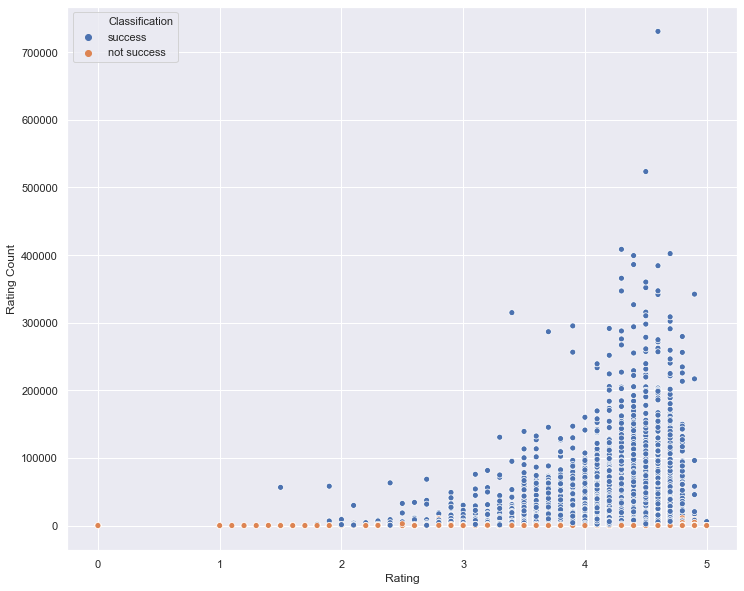

In [14]:
vis1 = sns.scatterplot(x = 'Rating', y = 'Rating Count', data = apps_data, hue = 'Classification')

The model focuses on the main conclusions obtained from the **EDA Notebook**. These conclusions state that only mobile games with high Rating and high Rating Count have the possibility of getting success because only mobile games with these characteristics have a lot of installs. In the above graphic, it can be appreciated that two groups are being formed. Even though the classifications do not follow the previously obtained conclusions exactly, it does create two clearly stated groups. The discrepancy between the data set's conclusions and classifications might be caused by a different behavior in the relations between Ranting and Maximum installs in the different mobile games categories. These relations and discrepancies are analyzed in the **EDA Notebook**.

## How a KNN Model Works and the Problem with that

The main idea of a KNN model is that if we have a set of points that form two classifications, we can predict the classification of another point by finding the nearest points of our original set to this new point. We do this by calculating the distance of our new point to all of the points in the set. Then we use the K nearest points' classification to predict the classification of our new point. For example, if we decide that we want to use the three nearest points to our new point, and two of these nearest points belong to a certain classification logically our new point will be assigned to this classification since is closer to it.

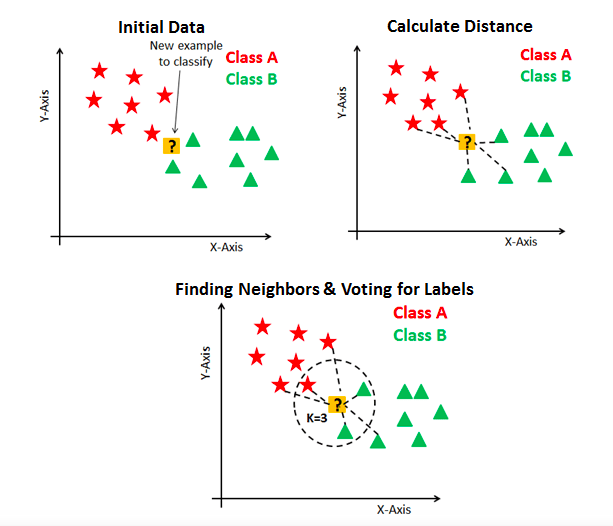

The problem with this type of algorithm is that data sets that are really big demand a lot of distance calculations between points. For data sets that contain more than 1,000 points, it may take hours to calculate the distance between all the points; therefore, it is necessary that the data set does not contain a lot of data. The problem is that the data set used in this project contains more than 30,000 mobile games which will cause the program to run for hours without any prediction. Therefore, I had to reduce the amount of data from 30,000 to 200 mobile games. I used excel to do this task, and the data were selected randomly to avoid biased predictions.

## Model Creation

There are a lot of libraries that can be imported into the Jupyter Notebook to create a KNN model. Nevertheless, these libraries do not reflect the useful role of Linear Algebra in a KNN model. Therefore, by following a tutorial that I found on google, I decided to use the principles from this tutorial since they will allow me to create the KNN model that I could explain. The tutorial is very useful and gives a lot of inside into how a KNN model works. If you would like to access this tutorial click on the following link and you will be redirected to it. [Click Here to see the Tutorial](https://www.edureka.co/blog/k-nearest-neighbors-algorithm/)

### Outline

- Import Useful Packages
- Reading Data Set
- Calculating the Distance Between Points
- Finding the K Nearest Neighbors
- Getting Data Classification Based on KNN
- Calculating the Accuracy of Model

### Import Useful Packages

In [36]:
import csv
import random
import math
import operator

- **CSV:** For the purpose of creating a simpler way of calculating the distance between points, it is necessary to use the *csv* package. Instead, of using the *Pandas* package.
- **Random:** We need the *random* package to have access to some functions that will allow us to split our sample randomly.
- **Math:** The *math* package is useful to import functions that will calculate the distance between points easily.
- **Operator:** The *operator* package is useful since it will allow us to use the sorted function to predict the classification.

### Reading Data Set

In [31]:
def readingDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(2):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

Instead of using the Pandas package to import and read the data set. It was needed to import the csv package to read the data. This is mainly because of the opportunities that shaping the data in my own way can bring. The *readinDataset* function takes the data and split it into rows, so each row has the Rating, Rating Count, and Classification of each game. The reason why the data was split in this way is that it will later be easy to calculate the distance between points. Secondly, the function converts the Rating and Rating Count strings to floats, so they can use in operations. Finally, based on a ratio that we can select the data set gets split into two sets which are the training set and test set which will be used for training the model, and testing its accuracy respectively.

### Calculating Distance Between Points

In [32]:
def calculatingDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

With the help of the math package, a function that calculates the distance between points was built. The function takes two points in the format of a row as explained in the **Reading Data Set** part. Then, it subtracts the first element inside of each point and adds it to a distance variable that starts at zero. This process repeats as a loop for each element. Therefore this function is able to calculate the distance between two points of whatever dimension. In this data set, it only calculates the data between points of two dimensions. Finally, it takes the square root of this sum to give us the distance. The idea is taken from the geometrical interpretation of Linear Algebra. It is basically calculating the distance between two points that can have any dimension.

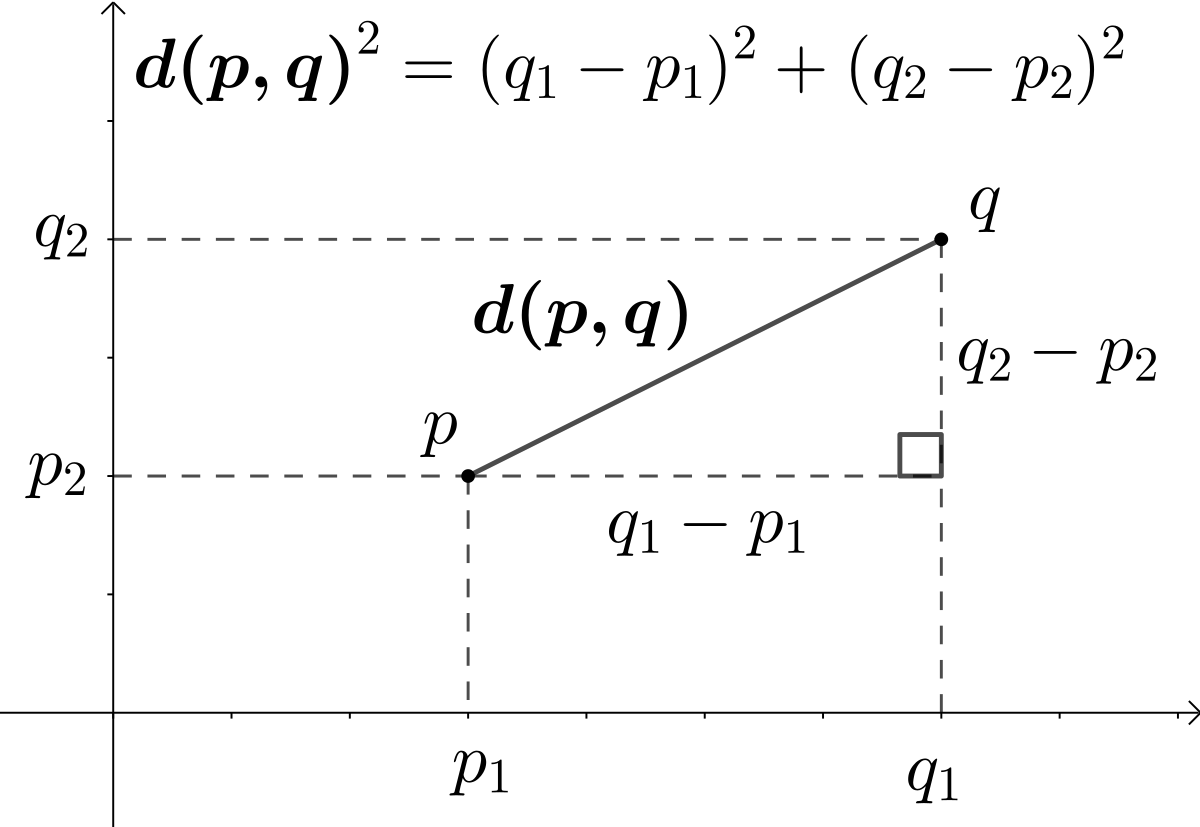

### Finding the K Nearest Neighboors

In [33]:
def findKNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = calculatingDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

The *findKNeighbors* function is very straight forward. It calculates the distance of each point in the test set to all the points in the training set and finds the K nearest neighbors to it. Then it creates an array that contains all the neighbors of that point.

### Getting Data Classification Based on KNN

In [34]:
def votingClassification(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

The next step is to predict the classification of a certain point based on the classification of its neighbors. This is done by accessing the array that contains the neighbors of each point and voting for each classification. In the end, this votation decides which is going to be the classification of each point.

### Calculating Accuracy of Model

In [35]:
def calculatingAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

The final step is to calculate the accuracy of these predictions. For this, we just compare the prediction to our test set. We check each point and if one point matches we add one to a variable that counts the correct predictions. Finally, with this number, we calculate the accuracy by dividing the correct predictions by the length of the predictions and multiplying them by 100. The number that we get is the percentage of correct predictions.

## Implementing our KNN Model to the Sample of the Data Set

In [28]:
trainingSet=[]
testSet=[]
readingDataset(r'Sample Model Data.csv.', 0.66, trainingSet, testSet)
print ('Train: ' + repr(len(trainingSet)))
print ('Test: ' + repr(len(testSet)))

Train: 128
Test: 71


Here we are implementing our functions to our data to build the model. The first step is to import the data set and split it into a training set and test set. As we can appreciate, after running this code we end up with a training set bigger than our test set as we expected.
Then we need to create our predictions. For this, we create an array of predictions that starts empty. Then we run a loop for each point in the test set. The code finds the neighbors of each point, then it predicts the classification of the point based on the neighbors' classification of each point. Finally, it adds that prediction to the array that would contain our predictions. In the end, we added a piece of code that shows the predicted result and the actual result, so the reader can compare them.

In [29]:
predictions = []
k = 3

for x in range(len(testSet)):
    neighbors = findKNeighbors(trainingSet, testSet[x], k)
    result = votingClassification(neighbors)
    predictions.append(result)   
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

> predicted='success', actual='success'
> predicted='not success', actual='not success'
> predicted='success', actual='success'
> predicted='success', actual='success'
> predicted='not success', actual='not success'
> predicted='success', actual='success'
> predicted='not success', actual='success'
> predicted='not success', actual='not success'
> predicted='not success', actual='not success'
> predicted='not success', actual='not success'
> predicted='success', actual='not success'
> predicted='not success', actual='not success'
> predicted='not success', actual='success'
> predicted='success', actual='success'
> predicted='not success', actual='not success'
> predicted='success', actual='success'
> predicted='not success', actual='success'
> predicted='not success', actual='not success'
> predicted='not success', actual='not success'
> predicted='not success', actual='not success'
> predicted='not success', actual='not success'
> predicted='success', actual='success'
> predicted='not

In [30]:
accuracy = calculatingAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 84.50704225352112%


The final piece of code calculates the Accuracy of the model. After running it a couple of times, it can be appreciated that the accuracy is always between 80% and 95%.

## Conclusions

The accuracy of the model implemented in this data set is very good. As a result, it can be stated that the Rating and Rating Count have a big impact on the success that a mobile game has. Indeed, for the most part, only those games with a lot of ratings and a good average rating can have success. This means that a mobile games developer should focus a lot on increasing the rating that his or her mobile games have. In addition, to keep a good rating so it could increment the number of downloads. The model also shows that mobile games group depending on the characteristics that they have. Indeed, the Rating and Rating count was enough to split them into two categories. However, models that involve the analysis of more variables could bring a completely new way of making mobile games. For example, it is believed that the size of a mobile game or the number of ads that a mobile game shows also influences the success that it might have. On the whole, the use of Data Science could bring a lot of help to the community involved in App Store Optimization.